In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the given csv data
data = pd.read_csv('beer-servings.csv')
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [6]:
data = pd.read_csv('beer-servings.csv', index_col = "Unnamed: 0")
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [7]:
data.shape

(193, 6)

In [8]:
data.info

<bound method DataFrame.info of          country  beer_servings  spirit_servings  wine_servings  \
0    Afghanistan            0.0              0.0            0.0   
1        Albania           89.0            132.0           54.0   
2        Algeria           25.0              0.0           14.0   
3        Andorra          245.0            138.0          312.0   
4         Angola          217.0             57.0           45.0   
..           ...            ...              ...            ...   
188    Venezuela            NaN            100.0            3.0   
189      Vietnam          111.0              2.0            1.0   
190        Yemen            6.0              0.0            0.0   
191       Zambia           32.0             19.0            4.0   
192     Zimbabwe           64.0             18.0            4.0   

     total_litres_of_pure_alcohol      continent  
0                             0.0           Asia  
1                             4.9         Europe  
2         

In [9]:
#checking for null values
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [10]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [11]:
num_cols = data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [14]:
type(num_cols)

numpy.ndarray

In [15]:
num_cols = pd.DataFrame(num_cols, columns=['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'] )

In [16]:
type(num_cols)

pandas.core.frame.DataFrame

In [17]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'], axis=1, inplace=True)

In [18]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [19]:
data = pd.concat([num_cols,data],axis=1)

In [20]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


# Method 2

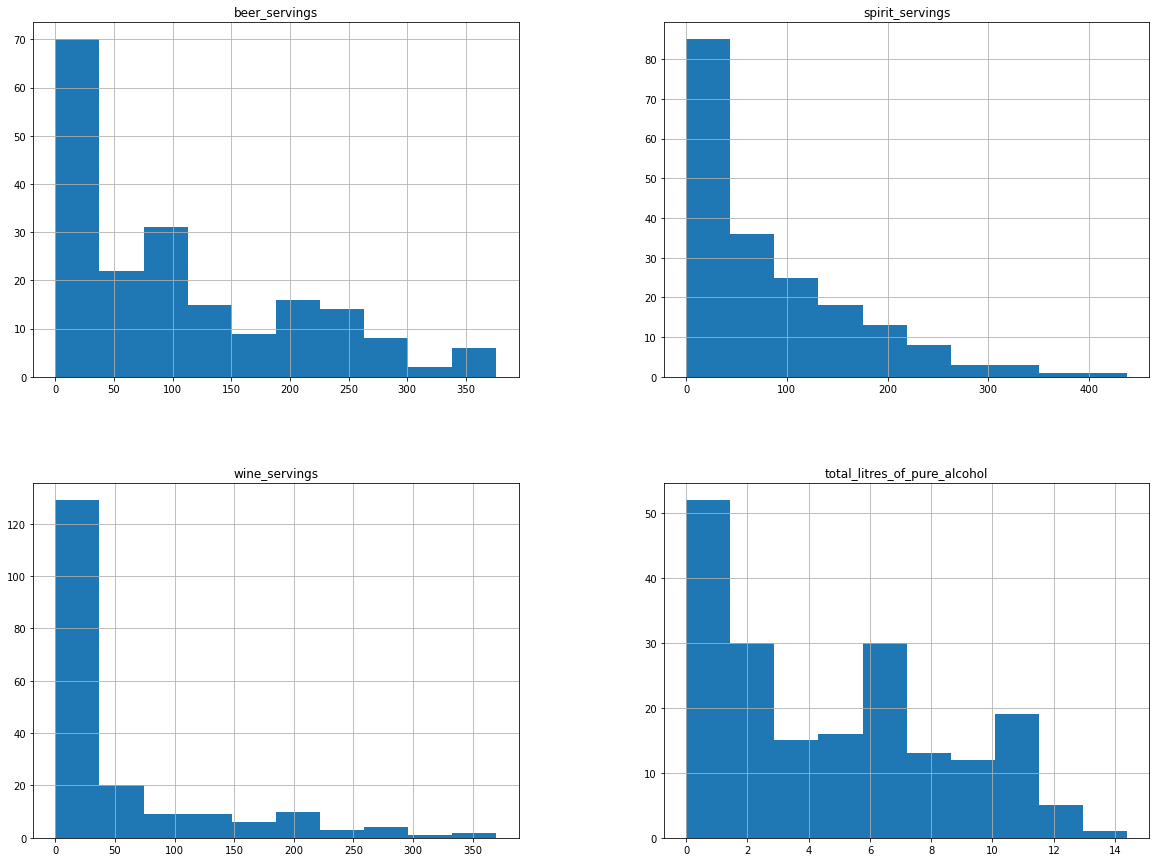

In [22]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [23]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())

In [24]:
data['beer_servings'].isna().sum()

0

In [28]:
for i in ['spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
    data[i] = data[i].fillna(data[i].median())

In [29]:
 data.isnull().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
country                         0
continent                       0
dtype: int64

# Managing Outliers

# Spirit servings

In [30]:
#calculating Q1,Q2 and Q3
Q1 = np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2 = np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3 = np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [31]:
print(Q1)
print(Q2)
print(Q3)

5.0
65.0
128.0


In [32]:
data['spirit_servings'].median()

65.0

In [34]:
#calculating Inter Quartile Range
IQR = Q3-Q1
IQR

123.0

In [35]:
#Calculating upper and lower limit
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

-179.5
312.5


In [36]:
outlier = []
for x in data ['spirit_servings']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [37]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

# wine_servings 

In [38]:
#calculating Q1,Q2 and Q3
Q1 = np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2 = np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3 = np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [39]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
59.0


In [40]:
data['wine_servings'].median()

9.0

In [41]:
#calculating Inter Quartile Range
IQR = Q3-Q1
IQR

58.0

In [42]:
#Calculating upper and lower limit
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

-86.0
146.0


In [44]:
outlier = []
for x in data ['wine_servings']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [45]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

# total litres of pure alcohol

In [46]:
#calculating Q1,Q2 and Q3
Q1 = np.percentile(data['total_litres_of_pure_alcohol'],25,interpolation='midpoint')
Q2 = np.percentile(data['total_litres_of_pure_alcohol'],50,interpolation='midpoint')
Q3 = np.percentile(data['total_litres_of_pure_alcohol'],75,interpolation='midpoint')

In [47]:
print(Q1)
print(Q2)
print(Q3)

1.3
4.3
7.2


In [48]:
data['total_litres_of_pure_alcohol'].median()

4.3

In [49]:
#calculating Inter Quartile Range
IQR = Q3-Q1
IQR

5.9

In [50]:
#Calculating upper and lower limit
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

-7.550000000000002
16.05


In [51]:
outlier = []
for x in data ['total_litres_of_pure_alcohol']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [52]:
outlier

[]